In [1]:
import pandas as pd

In [8]:
df = pd.read_csv('ott_case/ott-viewer-dropoff-retention-dataset/ott_viewer_dropoff_retention_us_v1.0.csv')

In [9]:
df.columns

Index(['show_id', 'title', 'platform', 'genre', 'release_year',
       'season_number', 'episode_number', 'episode_duration_min',
       'pacing_score', 'hook_strength', 'dialogue_density', 'visual_intensity',
       'avg_watch_percentage', 'pause_count', 'rewind_count', 'skip_intro',
       'cognitive_load', 'attention_required', 'night_watch_safe', 'drop_off',
       'drop_off_probability', 'retention_risk', 'dataset_version'],
      dtype='object')

In [10]:
df.head()

,show_id,title,platform,genre,release_year,season_number,episode_number,episode_duration_min,pacing_score,hook_strength,...,pause_count,rewind_count,skip_intro,cognitive_load,attention_required,night_watch_safe,drop_off,drop_off_probability,retention_risk,dataset_version
0,66732,Stranger Things,Netflix,Sci-Fi & Fantasy,2016.0,1,1,48,4,5,...,3,0,0,9,high,0,1,0.649,high,v1.0
1,66732,Stranger Things,Netflix,Sci-Fi & Fantasy,2016.0,1,2,55,5,4,...,3,3,1,5,medium,0,0,0.473,medium,v1.0
2,66732,Stranger Things,Netflix,Sci-Fi & Fantasy,2016.0,1,3,51,4,8,...,4,2,0,9,high,0,0,0.583,medium,v1.0
3,66732,Stranger Things,Netflix,Sci-Fi & Fantasy,2016.0,1,4,50,4,7,...,4,1,0,7,high,0,0,0.520,medium,v1.0
4,66732,Stranger Things,Netflix,Sci-Fi & Fantasy,2016.0,1,5,52,4,3,...,3,0,1,7,high,0,1,0.638,high,v1.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33171 entries, 0 to 33170
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   show_id               33171 non-null  int64  
 1   title                 33171 non-null  object 
 2   platform              33171 non-null  object 
 3   genre                 33171 non-null  object 
 4   release_year          33171 non-null  float64
 5   season_number         33171 non-null  int64  
 6   episode_number        33171 non-null  int64  
 7   episode_duration_min  33171 non-null  int64  
 8   pacing_score          33171 non-null  int64  
 9   hook_strength         33171 non-null  int64  
 10  dialogue_density      33171 non-null  object 
 11  visual_intensity      33171 non-null  int64  
 12  avg_watch_percentage  33171 non-null  int64  
 13  pause_count           33171 non-null  int64  
 14  rewind_count          33171 non-null  int64  
 15  skip_intro         

In [16]:
df['dialogue_density'].unique()

array(['high', 'low', 'medium'], dtype=object)

In [18]:
df['dialogue_density'] = df['dialogue_density'].map({'high':1,'medium':0.5,'low':0})

In [19]:
df[['pacing_score', 'hook_strength', 'dialogue_density', 'visual_intensity', 'cognitive_load', 'drop_off']].corr()

,pacing_score,hook_strength,dialogue_density,visual_intensity,cognitive_load,drop_off
pacing_score,1.000000,-0.001254,-0.005298,-0.000400,-0.570845,-0.413940
hook_strength,-0.001254,1.000000,0.004406,-0.009003,0.000098,-0.304553
dialogue_density,-0.005298,0.004406,1.000000,0.009934,0.623999,0.280124
visual_intensity,-0.000400,-0.009003,0.009934,1.000000,0.006662,0.002950
cognitive_load,-0.570845,0.000098,0.623999,0.006662,1.000000,0.569670
drop_off,-0.413940,-0.304553,0.280124,0.002950,0.569670,1.000000


Drop off has decent correlation with dialogue intensity and cognitive load

In [20]:
df[['pacing_score', 'hook_strength', 'dialogue_density', 'visual_intensity', 'cognitive_load', 'avg_watch_percentage']].corr()

,pacing_score,hook_strength,dialogue_density,visual_intensity,cognitive_load,avg_watch_percentage
pacing_score,1.000000,-0.001254,-0.005298,-0.000400,-0.570845,0.593569
hook_strength,-0.001254,1.000000,0.004406,-0.009003,0.000098,0.552426
dialogue_density,-0.005298,0.004406,1.000000,0.009934,0.623999,-0.324362
visual_intensity,-0.000400,-0.009003,0.009934,1.000000,0.006662,-0.009533
cognitive_load,-0.570845,0.000098,0.623999,0.006662,1.000000,-0.692126
avg_watch_percentage,0.593569,0.552426,-0.324362,-0.009533,-0.692126,1.000000


avg_watch_percentage has decent negative correlation with dialogue_density and cognitive_load

In [24]:
import matplotlib

<Axes: xlabel='hook_strength', ylabel='skip_intro'>

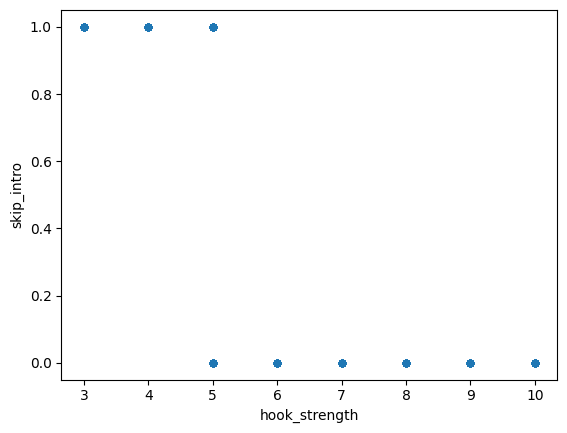

In [27]:
df[['hook_strength','skip_intro']].plot(kind='scatter',x='hook_strength',y='skip_intro')

Shows there is no drop off for hook strength>4